<a href="https://colab.research.google.com/github/iampramodyadav/FEA/blob/main/Gauss_Legendre_Quadrature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



# Gauss-Legendre Quadrature implementation in Python

By: Pramod Kumar Yadav (@iampramodyadav)



---



# Legendre Polynomial (symbolic)

[SymPy Documentation](https://docs.sympy.org/latest/tutorial/basic_operations.html)

[Gaussian quadrature](https://en.wikipedia.org/wiki/Gaussian_quadrature)

In [1]:
from sympy import *
import numpy as np

In [2]:
x=symbols('x')

In [3]:
def Legendre(n,x):
	x=symbols('x')
	if (n==0):
		return x*0+1.0
	elif (n==1):
		return x
	else:
		return ((2.0*n-1.0)*x*Legendre(n-1,x)-(n-1)*Legendre(n-2,x))/n

In [4]:
Legendre(2,x)

1.5*x**2 - 0.5

# Derivative of the Legendre polynomials

In [5]:
def DLegendre(n,x):
  x=symbols('x')
  if (n==0):
    return x*0
  elif (n==1):
    return x*0+1.0
  else:
    return (n/(x**2-1.0))*(x*Legendre(n,x)-Legendre(n-1,x))

In [6]:
simplify(DLegendre(2,x))

3.0*x

# Plot Legendre Polynomial

In [7]:
f=Legendre(3,x)

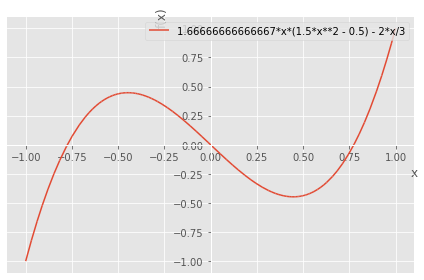

In [8]:
from matplotlib import style
style.use('ggplot')
plot(f,(x,-1,1),legend=True)

In [9]:
f1=Legendre(1,x)
f2=simplify(Legendre(3,x))

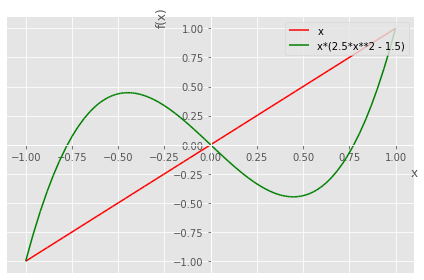

In [10]:
pl=plot(f1,f2,(x,-1,1),legend=True,show=False)
pl[0].line_color = 'red'
pl[1].line_color = 'green'
pl.show()

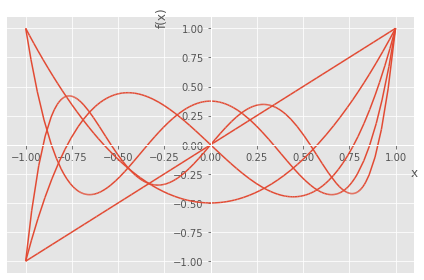

In [11]:
plot(Legendre(1,x),Legendre(2,x),Legendre(3,x),Legendre(4,x),Legendre(5,x),(x,-1,1))

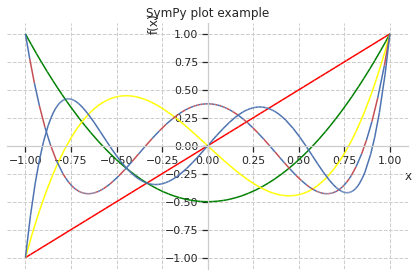

In [12]:
import seaborn as sns
sns.set()
sns.set_style("whitegrid", {'grid.linestyle': '--'})

p=plot(Legendre(1,x),Legendre(2,x),Legendre(3,x),Legendre(4,x),Legendre(5,x),(x,-1,1),title='SymPy plot example',show=False);
p[0].line_color = 'red'
p[1].line_color = 'green'
p[2].line_color = 'yellow'
p[3].line_color = ['b','r']
p.show()

# Legedre Roots

In [13]:
import numpy as np

In [14]:

def LegendreRoots(polyorder,tolerance=1e-20):
  if polyorder<2:
    err=1 # bad polyorder no roots can be found
  else:
    roots=[]
		# The polynomials are alternately even and odd functions. So we evaluate only half the number of roots. 
    for i in range(1,int((polyorder)/2) +1): 
      x1=cos(pi*(i-0.25)/(polyorder+0.5))
      error=10*tolerance
      iters=0
      while (error>tolerance) and (iters<1000):
        dx=-Legendre(polyorder,x)/DLegendre(polyorder,x)
        dx=N(dx.subs(x,x1))
        x1=N(x1+dx)
        iters=iters+1
        error=abs(dx)
      #print(roots)
      roots.append(x1)
      #print(roots)
		# Use symmetry to get the other roots
    roots=np.array(roots)
    if polyorder%2==0:
      roots=np.concatenate( (-1.0*roots, roots[::-1]) )
    else:
      roots=np.concatenate( (-1.0*roots, [0.0], roots[::-1]) )
    err=0 # successfully determined roots
  return [roots, err]

In [15]:
LegendreRoots(5)

[array([-0.906179845938664, -0.538469310105683, 0.0, 0.538469310105683,
        0.906179845938664], dtype=object), 0]

# Weight Coefficient

In [16]:
# Weight coefficients
def GaussLegendreWeights(polyorder):
  W=[]
  [xis,err]=LegendreRoots(polyorder)
  xis=list(xis)
  if err==0:
    for x1 in xis:
      w=2.0/( (1.0-x**2)*(DLegendre(polyorder,x)**2) )
      w=w.subs(x,x1)
      W.append(w)
      err=0
  else:
    err=1 # could not determine roots - so no weights
  return [W, xis, err]

# Final Result

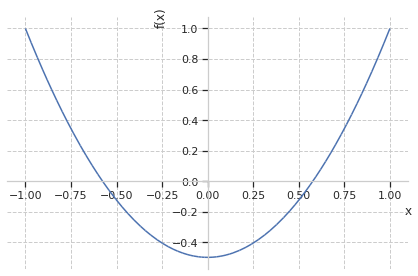

order: 2
Weights: [1.00000000000000, 1.00000000000000]
Roots    :  [-0.577350269189626, 0.577350269189626]





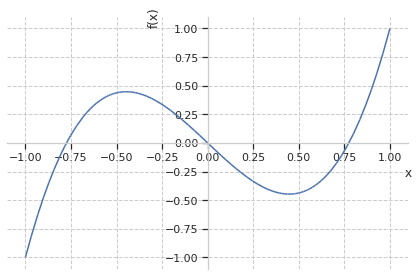

order: 3
Weights: [0.555555555555556, 0.888888888888889, 0.555555555555556]
Roots    :  [-0.774596669241483, 0.0, 0.774596669241483]





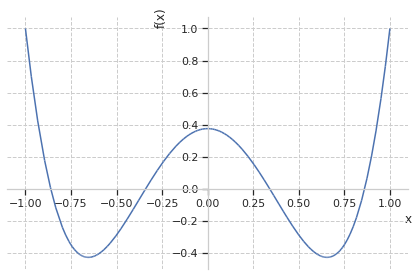

order: 4
Weights: [0.347854845137454, 0.652145154862546, 0.652145154862546, 0.347854845137454]
Roots    :  [-0.861136311594053, -0.339981043584856, 0.339981043584856, 0.861136311594053]





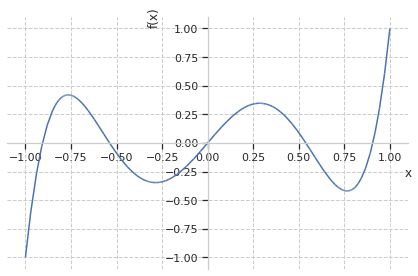

order: 5
Weights: [0.236926885056189, 0.478628670499366, 0.568888888888889, 0.478628670499366, 0.236926885056189]
Roots    :  [-0.906179845938664, -0.538469310105683, 0.0, 0.538469310105683, 0.906179845938664]





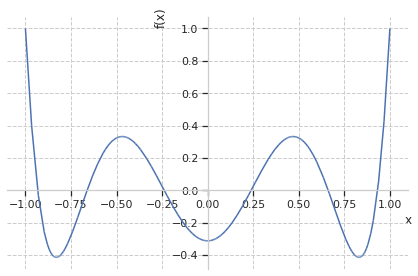

order: 6
Weights: [0.171324492379171, 0.360761573048138, 0.467913934572691, 0.467913934572691, 0.360761573048138, 0.171324492379171]
Roots    :  [-0.932469514203152, -0.661209386466265, -0.238619186083197, 0.238619186083197, 0.661209386466265, 0.932469514203152]





In [53]:
for Polyorder in range(2,7):
  plot(Legendre(Polyorder,x),(x,-1,1))

  [W, xis, err]=GaussLegendreWeights(Polyorder)
  print("order:", Polyorder)
  print("Weights:", W)
  print ("Roots    : ",xis)

  print('='*110)
  print('\n\n')
  print('='*110)



---


### [Referance](https://rosettacode.org/wiki/Numerical_integration/Gauss-Legendre_Quadrature)

In [ ]:
#@title
from numpy import *
 
##################################################################
# Recursive generation of the Legendre polynomial of order n
def Legendre(n,x):
	x=array(x)
	if (n==0):
		return x*0+1.0
	elif (n==1):
		return x
	else:
		return ((2.0*n-1.0)*x*Legendre(n-1,x)-(n-1)*Legendre(n-2,x))/n
 
##################################################################
# Derivative of the Legendre polynomials
def DLegendre(n,x):
  x=array(x)
  if (n==0):
    return x*0
  elif (n==1):
    return x*0+1.0
  else:
    return (n/(x**2-1.0))*(x*Legendre(n,x)-Legendre(n-1,x))
##################################################################
# Roots of the polynomial obtained using Newton-Raphson method
def LegendreRoots(polyorder,tolerance=1e-20):
  if polyorder<2:
    err=1 # bad polyorder no roots can be found
  else:
    roots=[]
		# The polynomials are alternately even and odd functions. So we evaluate only half the number of roots. 
    for i in range(1,int((polyorder)/2) +1): 
      x=cos(pi*(i-0.25)/(polyorder+0.5))
      error=10*tolerance
      iters=0
      while (error>tolerance) and (iters<1000):
        dx=-Legendre(polyorder,x)/DLegendre(polyorder,x)
        x=x+dx
        iters=iters+1
        error=abs(dx)
        append(roots, x)
		# Use symmetry to get the other roots
      roots=array(roots)
    if polyorder%2==0:
      roots=concatenate( (-1.0*roots, roots[::-1]) )
    else:
      roots=concatenate( (-1.0*roots, [0.0], roots[::-1]) )
    err=0 # successfully determined roots
  return [roots, err]
##################################################################
# Weight coefficients
def GaussLegendreWeights(polyorder):
	W=[]
	[xis,err]=LegendreRoots(polyorder)
	if err==0:
		W=2.0/( (1.0-xis**2)*(DLegendre(polyorder,xis)**2) )
		err=0
	else:
		err=1 # could not determine roots - so no weights
	return [W, xis, err]
##################################################################
# The integral value 
# func 		: the integrand
# a, b 		: lower and upper limits of the integral
# polyorder 	: order of the Legendre polynomial to be used
#
def GaussLegendreQuadrature(func, polyorder, a, b):
	[Ws,xs, err]= GaussLegendreWeights(polyorder)
	if err==0:
		ans=(b-a)*0.5*sum( Ws*func( (b-a)*0.5*xs+ (b+a)*0.5 ) )
	else: 
		# (in case of error)
		err=1
		ans=None
	return [ans,err]
##################################################################
# The integrand - change as required
def func(x):
	return exp(x)
##################################################################
# 
 
order=5
[Ws,xs,err]=GaussLegendreWeights(order)
if err==0:
	print ("Order    : ", order)
	print ("Roots    : ", xs)
	print ("Weights  : ", Ws)
else:
	print ("Roots/Weights evaluation failed")
 
# Integrating the function
[ans,err]=GaussLegendreQuadrature(func , order, -3,3)
if err==0:
	print ("Integral : ", ans)
else:
	print ("Integral evaluation failed")